In [64]:
# import liberaries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [65]:
# read data
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

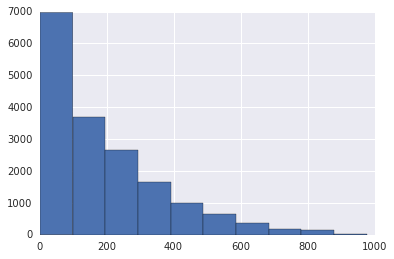

In [66]:
# histogram of target column(cnt) to check the distribution
plt.hist(bike_rentals["cnt"])

In [67]:
# correaltion table to check correlation between indepemend and target variable
bike_rentals.corr()["cnt"]


instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

#### Feature engineering

In [68]:
# Reasigning the hr column in to morning, afternoon, evining and night
def assign_label(hour):
    if hour >= 0 and hour < 6:
        return 4
    elif hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour < 24:
        return 3
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

    

In [69]:
# drop not important columns
#bike_rentals = bike_rentals.drop(["instant","hr"], axis = 1)
#bike_rentals.head()

##### Error metric
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [70]:
# splitting data into training and test sets
train = bike_rentals.sample(frac = .8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
print(train.shape)
print(test.shape)

(13903, 18)
(3476, 18)


### Training a linear regression model

In [71]:
# Linear regression model
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()

reg.fit(train[predictors], train["cnt"])

# check the error
import numpy
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)


17854.299853778626


#### Error
The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

### Training a decision tree model

In [73]:
# Linear regression model
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf = 5)

reg.fit(train[predictors], train["cnt"])

# check the error
import numpy
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2819.8158809314787

In [74]:
# checking with less leaf numbers
reg = DecisionTreeRegressor(min_samples_leaf = 2)

reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

3089.4793584579975


###### Decision tree error
By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

### Training random forest model

In [75]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [76]:
# checking the error
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2020.9104856162041

##### Random forest error
By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.